In [3]:
from pandas_datareader import DataReader
from datetime import datetime
import pandas as pd
import numpy as np
ms = DataReader('MS',  'yahoo', datetime(2019,1,1), datetime(2019,8,31))
returns = pd.DataFrame(np.diff(np.log(ms['Adj Close'].values)))
returns.index = ms.index.values[1:ms.index.values.shape[0]]
returns.columns = ['MS Returns']
ms['Close']

Date
2018-12-31    39.650002
2019-01-02    40.400002
2019-01-03    39.680000
2019-01-04    41.299999
2019-01-07    41.709999
                ...    
2019-08-26    40.160000
2019-08-27    39.790001
2019-08-28    40.380001
2019-08-29    41.290001
2019-08-30    41.490002
Name: Close, Length: 169, dtype: float64

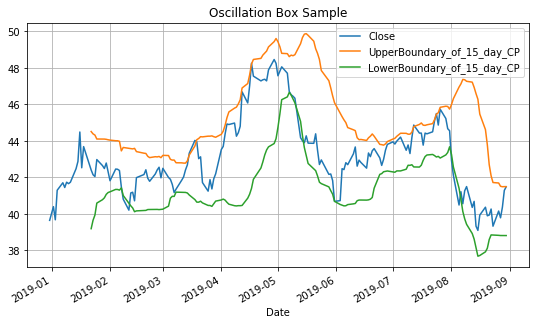

In [15]:
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
from matplotlib import pyplot as plt

def BBANDS(ms, window):
    MA = ms.Close.rolling(window).mean()
    SD = ms.Close.rolling(window).std()
    ms['UpperBoundary_of_15_day_CP'] = MA + (2 * SD) 
    ms['LowerBoundary_of_15_day_CP'] = MA - (2 * SD)
    return ms
 

n = 15
APPL_BBANDS = BBANDS(ms, n)

# Create the plot
currentAxis=pd.concat([APPL_BBANDS.Close,APPL_BBANDS.UpperBoundary_of_15_day_CP,APPL_BBANDS.LowerBoundary_of_15_day_CP],axis=1).plot(figsize=(9,5),grid=True)
plt.title("Oscillation Box Sample")

margin = .1

plt.show()



The most common approach, often used by binary options traders, is to consider Bollinger Bands as dynamic supports and resistances. Once the price has broken a band, it’s generally thought that it will likely return back towards the SMA.